In [15]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

import sys
import glob
import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [4]:
stop = stopwords.words('english')
stop = stop + [u'said',u'back',u'like',u'know',u'little']

In [5]:
tokenizer = RegexpTokenizer(r'\w+')

In [147]:
texts = []
path = '/home/amn34/metis/stuff/noirs/chandler'
for books in sorted(glob.glob(os.path.join(path, '*.txt'))):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    stopped = [w for w in docwords if not w in stop]
    #p_stem = PorterStemmer()
    #stemmed_words = [p_stem.stem(i) for i in stopped]
    texts.append(stopped)


In [70]:
#for i in texts: print i[0:50], '\n'

#### words across corpus

In [148]:
together = [item for sublist in texts for item in sublist]

In [149]:
len(together)

243067

In [150]:
from nltk import Text

In [151]:
from nltk import FreqDist

In [152]:
books = nltk.Text(together)

In [153]:
import pylab

In [154]:
from nltk.draw import dispersion_plot

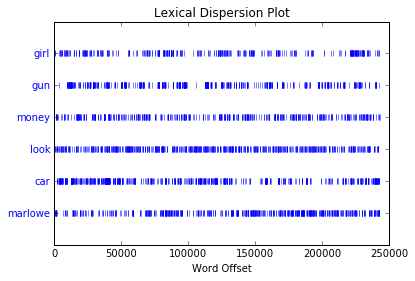

In [155]:
books.dispersion_plot(['girl','gun','money','look','car','marlowe'])

In [145]:
bookwords = [i for i in books]

In [77]:
books.similar('man')

guy one woman boy girl door think hand way fellow go let car tall good
leaned side got thing kind


In [78]:
books.similar('gun')

hand right around away money hat wallet card head one slowly glass
bottle came left think held photostat went hard


In [79]:
books.similar('girl')

man somebody around one morning right see wearily guy thing son way
voice check anybody hand well looked left cute


In [80]:
books.common_contexts(['man','gun'])

No common contexts were found


In [19]:
books.concordance('man')

Displaying 25 of 1402 matches:
hot hard coal black eyes general look man would pay get along thought might gen
 holding seem bother tall thin silver man sixty close little past blue eyes rem
s could skin smooth bright moved like man sound muscles walked slowly across fl
chair wheel chair old obviously dying man watched us come black eyes fire died 
er stood front mr marlowe general old man move speak even nod looked lifelessly
acks legs sat took hat deft scoop old man dragged voice bottom well brandy norr
 brandy beneath may take coat sir hot man blood veins stood peeled coat got han
t automatically cigarette stopped old man caught gesture smiled faintly may smo
dowed comers mouth nice state affairs man indulge vices proxy dryly looking dul
soft wet heat like pall around us old man nodded neck afraid weight head butler
d shut behind jungle sipped drink old man licked lips watching drawing one lip 
orney investigator chief investigator man named bernie ohls called told wanted 
 policeme

In [81]:
books.collocations()

bay city; shook head; eddie mars; last night; los angeles; mrs
murdock; living room; bill chess; mavis weld; miss fromsett; long
time; philip marlowe; thousand dollars; door opened; could see; terry
lennox; harlan potter; new york; say anything; idle valley


In [146]:
books.count('gun') + books.count('guns')

700

In [83]:
fd = nltk.FreqDist(books)

In [84]:
fd

FreqDist({u'fawn': 27,
          u'raining': 6,
          u'tommyguns': 1,
          u'cussed': 1,
          u'yellow': 115,
          u'narcotic': 7,
          u'four': 200,
          u'gag': 18,
          u'woods': 6,
          u'clotted': 3,
          u'spiders': 3,
          u'knucks': 3,
          u'railing': 34,
          u'towns': 7,
          u'payoff': 4,
          u'looking': 529,
          u'canes': 1,
          u'fiddling': 2,
          u'attracted': 1,
          u'electricity': 2,
          u'chatter': 2,
          u'plowhorse': 1,
          u'unanswered': 1,
          u'sunlit': 1,
          u'originality': 1,
          u'fingernails': 29,
          u'opener': 6,
          u'lord': 2,
          u'immature': 1,
          u'flicking': 6,
          u'meadows': 2,
          u'shaving': 5,
          u'sinking': 1,
          u'swivel': 13,
          u'callin': 1,
          u'magoozium': 1,
          u'dell': 1,
          u'knelt': 2,
          u'anaemic': 1,
          u'forties

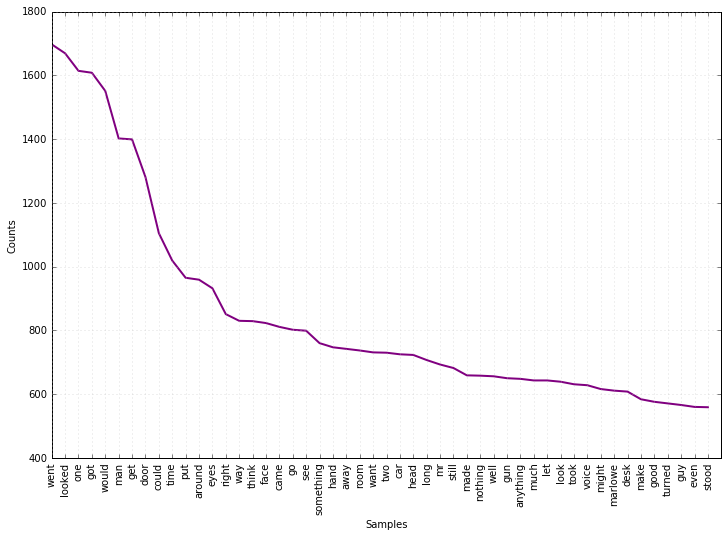

In [85]:
plt.figure(figsize = (12,8))
fd.plot(50,cumulative=False,color='purple')

In [25]:
fd.hapaxes()

[u'tommyguns',
 u'cussed',
 u'prices',
 u'peekin',
 u'increase',
 u'canes',
 u'camarillo',
 u'rupture',
 u'plowhorse',
 u'unanswered',
 u'sunlit',
 u'originality',
 u'clanked',
 u'immature',
 u'sinking',
 u'callin',
 u'dell',
 u'forties',
 u'broiler',
 u'yachting',
 u'dissolutely',
 u'jarringly',
 u'happenings',
 u'festered',
 u'specially',
 u'panther',
 u'shoelaces',
 u'tumed',
 u'shrugging',
 u'milled',
 u'tensely',
 u'unlisted',
 u'medically',
 u'automatics',
 u'9521',
 u'herd',
 u'repotting',
 u'finked',
 u'cult',
 u'confronts',
 u'natured',
 u'skipouts',
 u'uplifting',
 u'climber',
 u'burrow',
 u'_would_',
 u'classification',
 u'scold',
 u'lynne',
 u'shoddy',
 u'ducky',
 u'browse',
 u'42',
 u'swap',
 u'intake',
 u'morally',
 u'grimed',
 u'pompadour',
 u'aloofness',
 u'sweeter',
 u'plunges',
 u'mindedness',
 u'digit',
 u'caution',
 u'rayon',
 u'newscameramen',
 u'hog',
 u'magoozium',
 u'cutback',
 u'backstairs',
 u'canaries',
 u'dignified',
 u'terrycloth',
 u'hoot',
 u'despondent',

In [26]:
books.count('dame')

26

In [27]:
books.count('girl')

397

#### per book

In [7]:
sent = pd.read_pickle('sentiment.pkl')

In [8]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [11]:
from collections import Counter

In [9]:
woman = [u'she',u'her',u'girl',u'woman',u'blonde']
uniwoman = [unicode(i) for i in woman]

In [13]:
wordcounts=[]
wordprop = []
lengths = []
fds = []
sentscore = []
sentpages = []
womanpages = []
poscount = []
negcount = []

for i in texts:
    lengths.append(len(i))
    book = nltk.Text(i)
    wordcounts.append([book.count('gun'), book.count('girl'), book.count('cigarette')])
    wordprop.append([(book.count('gun')/float(len(i))), (book.count('girl')/float(len(i))),(book.count('cigarette')/float(len(i)))])
    fd = nltk.FreqDist(book)
    fds.append(fd)
    
    #bookwords = [i.encode('utf-8') for i in book]
    bookwords = [i for i in book]
    words = pd.DataFrame(columns=['word'])
    words.word = bookwords
    booksentiment = pd.merge(words, sent, how='left', on='word')
    booksentiment.fillna(0, inplace=True)
    sentscore.append(sum(booksentiment.sentiment))
    
    pagesent = []
    for chunk in chunker(booksentiment,150):
        pagesent.append(sum(chunk.sentiment))
    sentpages.append(pagesent)
    
    pagewoman = []
    for chunk in chunker(bookwords,150):
        womantmp = 0
        for word in chunk:
            if word in uniwoman:
                womantmp+=1
        pagewoman.append(womantmp)
    womanpages.append(pagewoman)
    
    poscount.append(Counter(booksentiment.sentiment.values)[1])
    negcount.append(Counter(booksentiment.sentiment.values)[-1])

In [91]:
lengths

[30732, 36574, 31723, 32915, 35048, 53670, 22405]

In [92]:
#pre stop word lengths: [31642, 37630, 32703, 33922, 36076, 55034, 22985]

In [94]:
poscount

[4047, 4955, 4673, 4461, 4975, 8132, 3408]

In [93]:
posprop = [i/float(j) for i,j in zip(poscount,lengths)]

In [ ]:
#pre stop pos: [4766, 5763, 5463, 5239, 5745, 9284, 3897]
#pre stop neg: [3828, 4418, 3777, 3992, 4362, 6848, 2526]

In [95]:
negcount

[3637, 4170, 3587, 3763, 4104, 6636, 2435]

In [96]:
negprop = [i/float(j) for i,j in zip(negcount,lengths)]

In [97]:
negprop

[0.11834569829493688,
 0.11401542079072566,
 0.11307253412350661,
 0.11432477593802218,
 0.11709655329833371,
 0.12364449413079932,
 0.1086810979692033]

In [98]:
posprop

[0.131686841077704,
 0.13547875540001095,
 0.14730637077199507,
 0.1355309129576181,
 0.14194818534581147,
 0.1515185392211664,
 0.15210890426244142]

In [33]:
gun = [i[0] for i in wordprop]
girl = [i[1] for i in wordprop]
cig = [i[2] for i in wordprop]

In [34]:
gun

[0.002875924404272802,
 0.0024980069093808134,
 0.004128061645720576,
 0.0028300218147514888,
 0.002300698525335403,
 0.0019442526438201838,
 0.0019142919295192518]

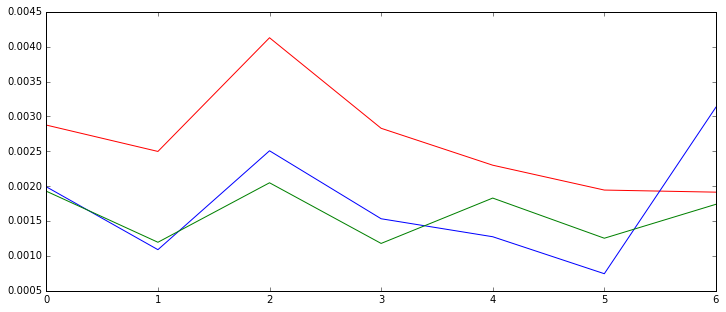

In [35]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gun)),gun,color='r')
plt.plot(range(len(girl)),girl,color='b')
plt.plot(range(len(cig)),cig,color='g')

In [102]:
normlengths = [(i-np.mean(lengths))/(max(lengths)-min(lengths)) for i in lengths]
normsent = [(i-np.mean(sentscore))/(max(sentscore)-min(sentscore)) for i in sentscore]

In [103]:
normlengths

[-0.12767814306275851,
 0.059176166868474496,
 -0.095981357519819122,
 -0.057855657855657924,
 0.010367594982979532,
 0.60598569829339055,
 -0.39401430170660945]

In [104]:
normsent

[-0.45369639568534592,
 -0.108392528282031,
 0.16877137595369643,
 -0.18850302551960005,
 -0.029202841357537444,
 0.54630360431465408,
 0.064719810576164216]

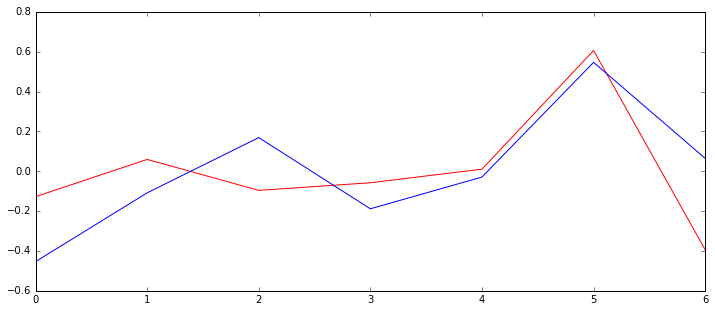

In [105]:
plt.figure(figsize=(12,5))
plt.plot(range(len(normlengths)),normlengths,color='r')
plt.plot(range(len(normsent)),normsent,color='b')

In [37]:
gunabs = [i[0] for i in wordcounts]
girlabs = [i[1] for i in wordcounts]
cigabs = [i[2] for i in wordcounts]

In [38]:
wordcounts

[[91, 63, 61],
 [94, 41, 45],
 [135, 82, 67],
 [96, 52, 40],
 [83, 46, 66],
 [107, 41, 69],
 [44, 72, 40]]

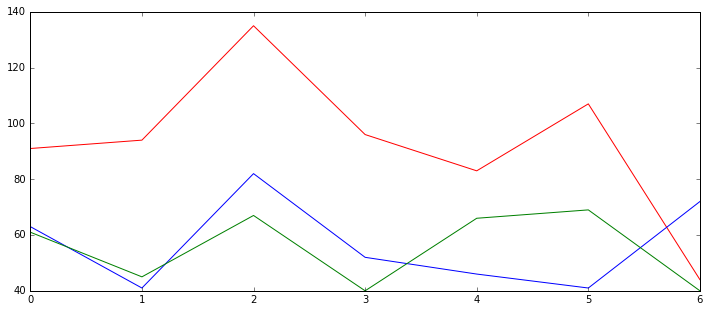

In [39]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gunabs)),gunabs,color='r')
plt.plot(range(len(girlabs)),girlabs,color='b')
plt.plot(range(len(cigabs)),cigabs,color='g')

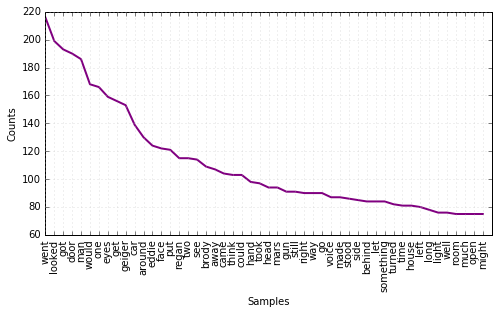

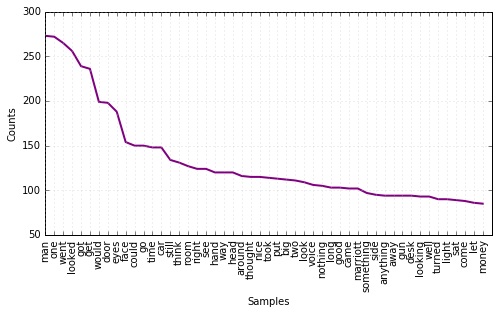

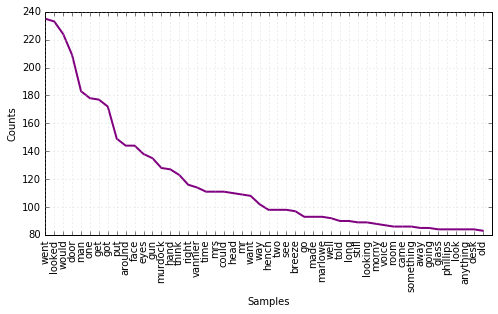

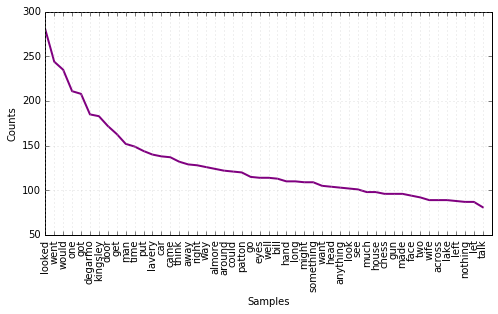

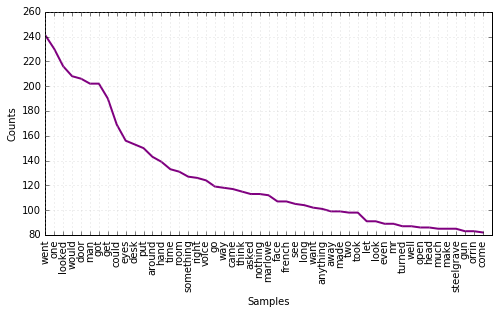

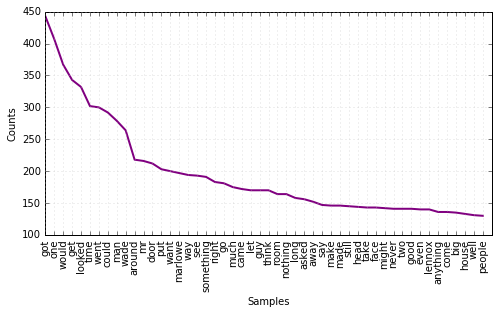

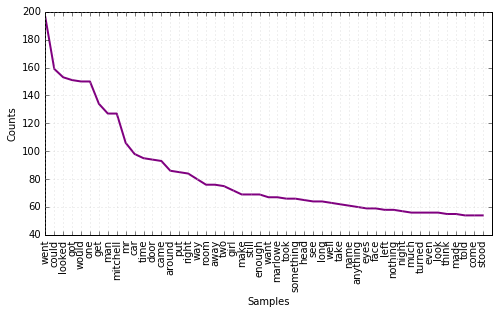

In [106]:
for i in fds:
    plt.figure(figsize=(8,4))
    i.plot(50,cumulative=False,color='purple')

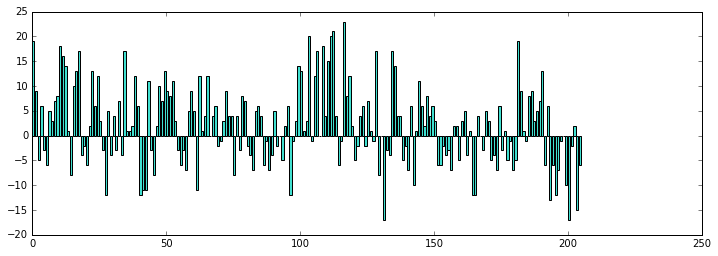

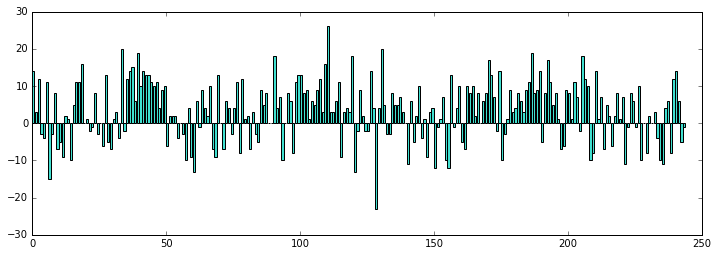

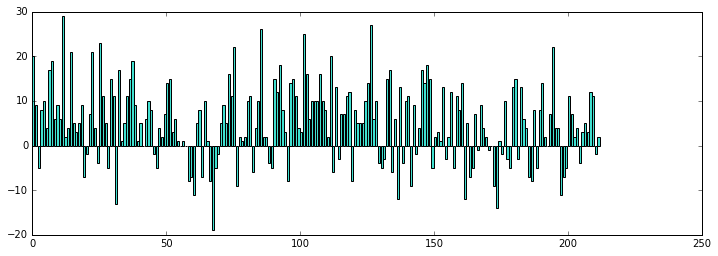

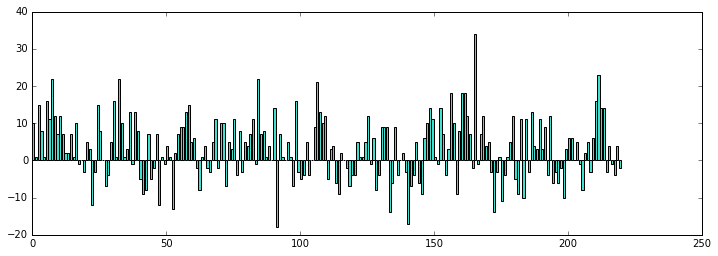

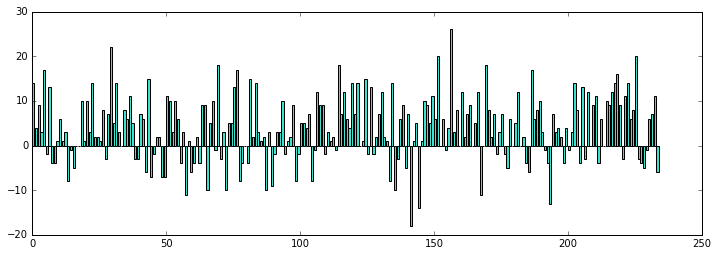

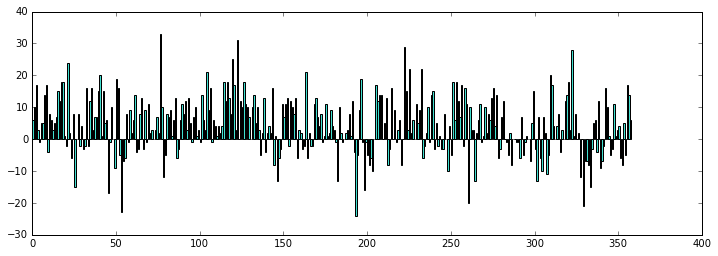

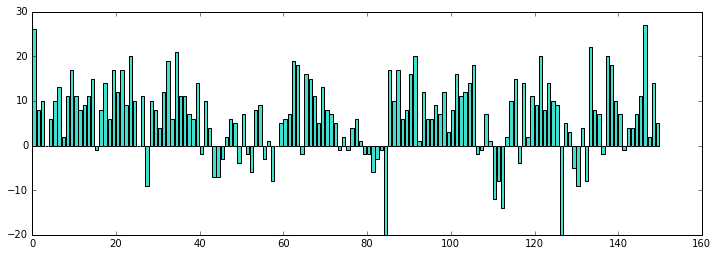

In [108]:
for i in sentpages:
    plt.figure(figsize=(12,4))
    plt.bar(range(len(i)),i,color='turquoise')

#### sentiment transforms

In [19]:
from scipy import fftpack

#### sp1

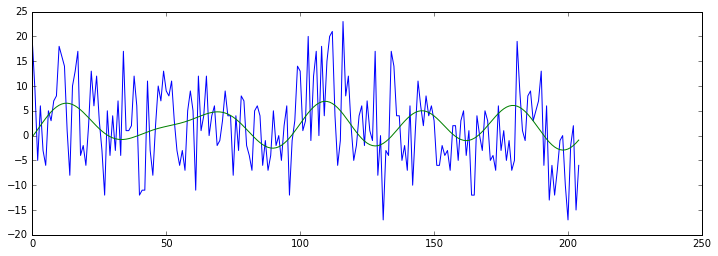

In [104]:
x = range(len(sentpages[0]))
cN = len(sentpages[0])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[0])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/5)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp1

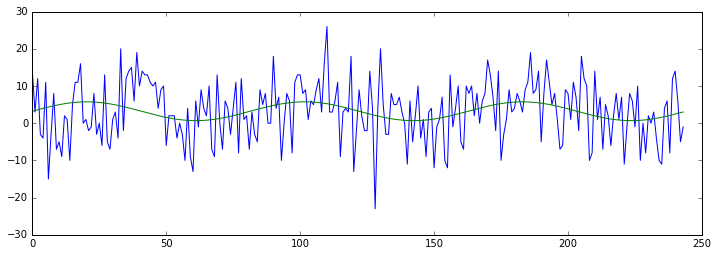

In [105]:
x = range(len(sentpages[1]))
cN = len(sentpages[1])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[1])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/10)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp2

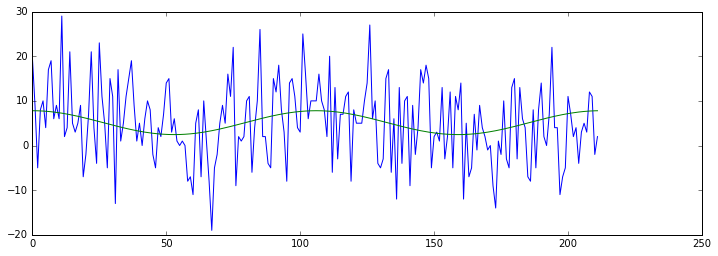

In [106]:
x = range(len(sentpages[2]))
cN = len(sentpages[2])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[2])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/16)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp3

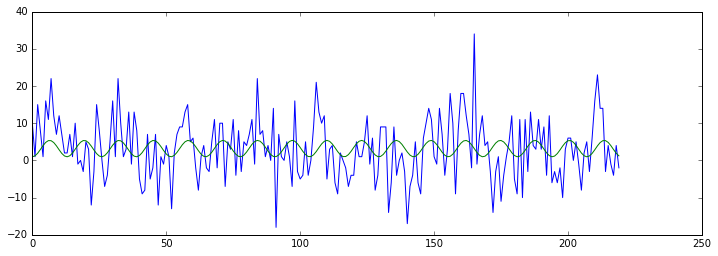

In [107]:
x = range(len(sentpages[3]))
cN = len(sentpages[3])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[3])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/9)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp4

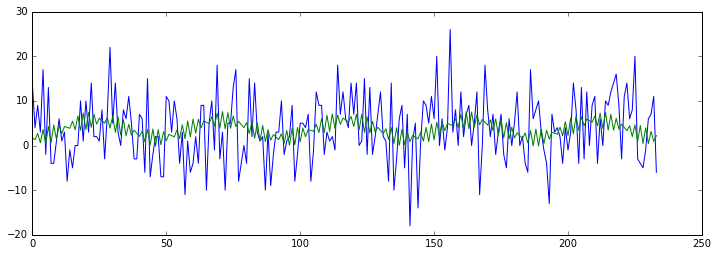

In [108]:
x = range(len(sentpages[4]))
cN = len(sentpages[4])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[4])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/15)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp5

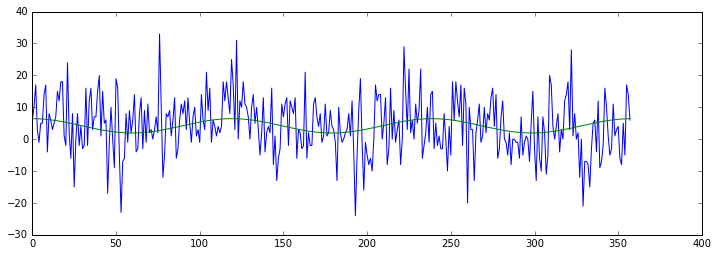

In [109]:
x = range(len(sentpages[5]))
cN = len(sentpages[5])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[5])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/15)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp6

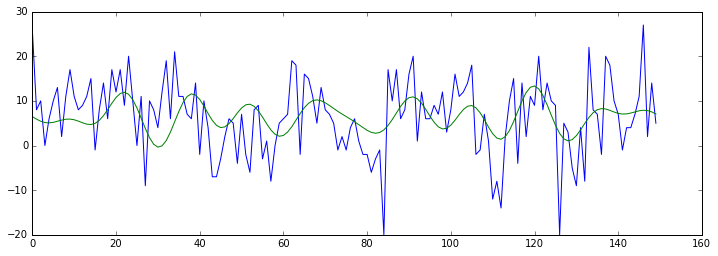

In [135]:
x = range(len(sentpages[6]))
cN = len(sentpages[6])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[6])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/35)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp7

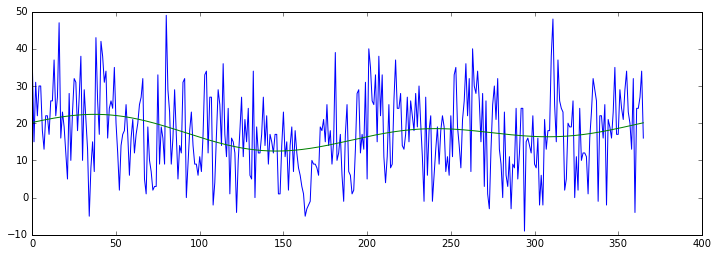

In [128]:
x = range(len(sentpages[7]))
cN = len(sentpages[7])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[7])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/164)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sentiment dictionary

In [157]:
sentdictwords = sent.word.values

In [158]:
uniques = set(together)

In [159]:
unique = [i for i in uniques]

In [160]:
len(unique), len(together)

(15375, 243067)

In [161]:
rep = []
for word in unique:
    if word in sentdictwords:
        rep.append(word)

In [162]:
len(rep)

5739

In [163]:
sentwords = zip(sent.word, sent.sentiment)

In [164]:
poswords = []
negwords = []
for i in sentwords:
    if i[1] == 1:
        poswords.append(i[0])
    elif i[1] == -1:
        negwords.append(i[0])

In [165]:
len(poswords), len(negwords)

(4295, 6621)

In [166]:
chandlerposwords = []
chandlernegwords = []
for i in rep:
    if i in poswords:
        chandlerposwords.append(i)
    elif i in negwords:
        chandlernegwords.append(i)

In [167]:
chandlerposwords

[u'increase',
 u'electricity',
 u'originality',
 u'leisurely',
 u'straight',
 u'elegant',
 u'reporter',
 u'uplifting',
 u'elaborate',
 u'golden',
 u'music',
 u'relax',
 u'successful',
 u'household',
 u'organized',
 u'want',
 u'absolute',
 u'preferably',
 u'travel',
 u'feature',
 u'hot',
 u'significance',
 u'dignified',
 u'beauty',
 u'unselfish',
 u'effective',
 u'wins',
 u'soothingly',
 u'easier',
 u'slate',
 u'prize',
 u'spotless',
 u'substantially',
 u'mend',
 u'assured',
 u'tempting',
 u'angelic',
 u'playfully',
 u'traction',
 u'basketball',
 u'master',
 u'positively',
 u'tree',
 u'willingness',
 u'girder',
 u'concrete',
 u'recommended',
 u'absorbed',
 u'morality',
 u'professor',
 u'quaint',
 u'rich',
 u'heartily',
 u'cushion',
 u'nicely',
 u'fair',
 u'hero',
 u'best',
 u'score',
 u'impetus',
 u'refinement',
 u'pith',
 u'lighthouse',
 u'privilege',
 u'gladly',
 u'child',
 u'worked',
 u'trusted',
 u'exertion',
 u'fairly',
 u'effortlessly',
 u'permit',
 u'tops',
 u'dexterous',
 u'stil

In [168]:
chandlernegwords

[u'fawn',
 u'cussed',
 u'narcotic',
 u'rupture',
 u'lord',
 u'immature',
 u'sinking',
 u'impertinent',
 u'uncertain',
 u'disturb',
 u'tired',
 u'hanging',
 u'rusty',
 u'ruthless',
 u'cult',
 u'secluded',
 u'scold',
 u'shoddy',
 u'stern',
 u'cheating',
 u'spoke',
 u'superficially',
 u'strike',
 u'hurt',
 u'hole',
 u'dreadful',
 u'artillery',
 u'dragons',
 u'caution',
 u'hog',
 u'complaining',
 u'shrug',
 u'hoot',
 u'despondent',
 u'wrong',
 u'grudgingly',
 u'seduce',
 u'sickening',
 u'blind',
 u'wrought',
 u'screaming',
 u'hidden',
 u'ached',
 u'clumsy',
 u'dumps',
 u'burial',
 u'whim',
 u'whip',
 u'smirk',
 u'fugitive',
 u'obstructing',
 u'enormous',
 u'flicker',
 u'disturbed',
 u'chronic',
 u'thankless',
 u'stripe',
 u'haggle',
 u'disfigured',
 u'bitter',
 u'collapse',
 u'motionless',
 u'crawl',
 u'pneumonia',
 u'idle',
 u'feeling',
 u'shyly',
 u'gripe',
 u'pander',
 u'object',
 u'errors',
 u'addict',
 u'conceded',
 u'drought',
 u'dummy',
 u'howl',
 u'scream',
 u'bile',
 u'lethal',
 u

In [184]:
len(chandlerposwords)/float(len(chandlerposwords + chandlernegwords))

0.42723492723492723

In [170]:
Counter(together).most_common()

[(u'went', 1697),
 (u'looked', 1669),
 (u'one', 1614),
 (u'got', 1608),
 (u'would', 1551),
 (u'man', 1402),
 (u'get', 1399),
 (u'door', 1281),
 (u'could', 1105),
 (u'time', 1019),
 (u'put', 965),
 (u'around', 959),
 (u'eyes', 932),
 (u'right', 851),
 (u'way', 830),
 (u'think', 829),
 (u'face', 823),
 (u'came', 811),
 (u'go', 802),
 (u'see', 799),
 (u'something', 760),
 (u'hand', 747),
 (u'away', 742),
 (u'room', 737),
 (u'want', 731),
 (u'two', 730),
 (u'car', 725),
 (u'head', 723),
 (u'long', 707),
 (u'mr', 693),
 (u'still', 682),
 (u'made', 659),
 (u'nothing', 658),
 (u'well', 656),
 (u'gun', 650),
 (u'anything', 648),
 (u'much', 643),
 (u'let', 643),
 (u'look', 639),
 (u'took', 631),
 (u'voice', 628),
 (u'might', 616),
 (u'marlowe', 611),
 (u'desk', 608),
 (u'make', 584),
 (u'good', 576),
 (u'turned', 571),
 (u'guy', 566),
 (u'even', 560),
 (u'stood', 559),
 (u'house', 557),
 (u'come', 552),
 (u'asked', 551),
 (u'say', 548),
 (u'take', 537),
 (u'left', 532),
 (u'looking', 529),
 (u'

In [171]:
completeposwords = []
completenegwords = []
for i in together:
    if i in poswords:
        completeposwords.append(i)
    elif i in negwords:
        completenegwords.append(i)

In [172]:
len(completeposwords), len(completenegwords)

(34651, 28332)

In [173]:
Counter(completeposwords).most_common()

[(u'right', 851),
 (u'hand', 747),
 (u'want', 731),
 (u'well', 656),
 (u'might', 616),
 (u'make', 584),
 (u'good', 576),
 (u'even', 560),
 (u'stood', 559),
 (u'enough', 521),
 (u'money', 503),
 (u'open', 500),
 (u'white', 493),
 (u'kind', 465),
 (u'nice', 427),
 (u'light', 426),
 (u'sure', 380),
 (u'police', 337),
 (u'call', 326),
 (u'give', 323),
 (u'talk', 316),
 (u'home', 300),
 (u'found', 280),
 (u'yes', 277),
 (u'sound', 268),
 (u'work', 267),
 (u'better', 262),
 (u'pretty', 259),
 (u'job', 227),
 (u'smile', 222),
 (u'green', 220),
 (u'full', 202),
 (u'quiet', 195),
 (u'top', 181),
 (u'help', 179),
 (u'friend', 172),
 (u'matter', 162),
 (u'large', 159),
 (u'fast', 156),
 (u'wide', 152),
 (u'care', 151),
 (u'please', 144),
 (u'carefully', 139),
 (u'easy', 133),
 (u'reason', 132),
 (u'clear', 132),
 (u'eye', 131),
 (u'okay', 131),
 (u'doctor', 130),
 (u'love', 130),
 (u'soft', 128),
 (u'sharp', 127),
 (u'live', 125),
 (u'breeze', 125),
 (u'law', 124),
 (u'building', 123),
 (u'clean'

In [174]:
Counter(completenegwords).most_common()

[(u'long', 707),
 (u'gun', 650),
 (u'hard', 476),
 (u'small', 442),
 (u'slowly', 434),
 (u'dark', 396),
 (u'cigarette', 388),
 (u'dead', 358),
 (u'black', 334),
 (u'mean', 296),
 (u'hell', 251),
 (u'case', 245),
 (u'shot', 242),
 (u'tough', 235),
 (u'miss', 223),
 (u'close', 220),
 (u'empty', 210),
 (u'trying', 206),
 (u'hung', 202),
 (u'killed', 196),
 (u'mind', 192),
 (u'wrong', 188),
 (u'bad', 182),
 (u'leave', 170),
 (u'tired', 162),
 (u'try', 162),
 (u'drunk', 160),
 (u'trouble', 158),
 (u'cold', 158),
 (u'damn', 157),
 (u'need', 155),
 (u'boy', 154),
 (u'smoke', 152),
 (u'cut', 150),
 (u'sorry', 142),
 (u'smell', 135),
 (u'afraid', 133),
 (u'bar', 131),
 (u'low', 126),
 (u'hit', 126),
 (u'loose', 118),
 (u'murder', 117),
 (u'blood', 117),
 (u'wait', 114),
 (u'deep', 111),
 (u'pale', 108),
 (u'spoke', 105),
 (u'forget', 104),
 (u'hardly', 103),
 (u'hurt', 101),
 (u'kill', 100),
 (u'funny', 100),
 (u'lying', 99),
 (u'block', 98),
 (u'late', 97),
 (u'sick', 95),
 (u'noise', 93),
 (u

#### just the big sleep

In [175]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/39_rc_bigsleep.txt').read()

In [176]:
sleep = sleep.decode('utf-8')

In [177]:
sleep = sleep.lower()

In [178]:
docwords = tokenizer.tokenize(doc)
stopped = [w for w in docwords if not w in stop]

In [179]:
len(stopped)

22405

In [180]:
sleeppos = []
sleepneg = []
for i in stopped:
    if i in poswords:
        sleeppos.append(i)
    elif i in negwords:
        sleepneg.append(i)

In [181]:
len(sleeppos), len(sleepneg)

(3408, 2435)

In [182]:
sleeppos

[u'sharp',
 u'well',
 u'upside',
 u'best',
 u'fresh',
 u'young',
 u'young',
 u'full',
 u'sir',
 u'want',
 u'meet',
 u'super',
 u'clear',
 u'enough',
 u'sure',
 u'accept',
 u'might',
 u'basic',
 u'facts',
 u'suit',
 u'better',
 u'necessary',
 u'information',
 u'efficient',
 u'hope',
 u'efficient',
 u'breakfast',
 u'well',
 u'want',
 u'clear',
 u'important',
 u'influential',
 u'advance',
 u'money',
 u'pay',
 u'expect',
 u'degree',
 u'efficiency',
 u'best',
 u'please',
 u'white',
 u'well',
 u'cherished',
 u'word',
 u'helped',
 u'nice',
 u'especially',
 u'reading',
 u'open',
 u'light',
 u'please',
 u'lighter',
 u'care',
 u'suit',
 u'well',
 u'marked',
 u'advance',
 u'professional',
 u'marked',
 u'advance',
 u'necessary',
 u'exact',
 u'buy',
 u'open',
 u'word',
 u'might',
 u'discuss',
 u'natural',
 u'ease',
 u'experience',
 u'might',
 u'wide',
 u'clear',
 u'giving',
 u'fine',
 u'happy',
 u'clearly',
 u'king',
 u'natural',
 u'distinct',
 u'well',
 u'make',
 u'moving',
 u'moving',
 u'right',


In [183]:
sleepneg

[u'lawyer',
 u'lawyer',
 u'sorry',
 u'tired',
 u'case',
 u'interrupted',
 u'hysterical',
 u'miss',
 u'grudgingly',
 u'miss',
 u'waste',
 u'hung',
 u'struggled',
 u'miss',
 u'chintzy',
 u'dirty',
 u'smelled',
 u'painful',
 u'sheer',
 u'cigarette',
 u'mind',
 u'wear',
 u'miss',
 u'need',
 u'goof',
 u'expenses',
 u'expenses',
 u'miss',
 u'case',
 u'wrong',
 u'busy',
 u'pose',
 u'serious',
 u'nervous',
 u'taut',
 u'miss',
 u'dark',
 u'low',
 u'conservative',
 u'scars',
 u'scratches',
 u'tense',
 u'liquor',
 u'coop',
 u'miss',
 u'miss',
 u'halfway',
 u'rotten',
 u'sorry',
 u'hate',
 u'mean',
 u'cheap',
 u'case',
 u'subject',
 u'spot',
 u'dumped',
 u'trash',
 u'unhappy',
 u'rack',
 u'hung',
 u'rack',
 u'dark',
 u'hanging',
 u'wait',
 u'small',
 u'miss',
 u'long',
 u'rack',
 u'inevitable',
 u'subject',
 u'subject',
 u'deep',
 u'buck',
 u'teasing',
 u'mean',
 u'subject',
 u'subject',
 u'enormous',
 u'subject',
 u'regretted',
 u'rough',
 u'conceited',
 u'small',
 u'twisted',
 u'slowly',
 u'case